#                                                  Analyzing Amazon Sales data:

#### - Importing the necessary Libraries to perform the EDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 1000)  # This will display all rows
pd.set_option('display.max_columns', 200)  # This will display all columns

#### - Importing the CSV file from the system.

In [3]:
Data_Frame= pd.read_csv('/Users/sanjay/Desktop/Working UMProject/Project -1/Amazon Sales data.csv')

In [4]:
Data_Frame.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2/5/2014,341417157,8/5/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,5/7/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,1/2/2013,115456712,6/2/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
Data_Frame.shape

(100, 14)

In [6]:
Data_Frame.ndim

2

### Performing the ETL for the dataset.

#### Seeing if there is any duplicates, missing valves in dataset and the adjusting the dtpyes of the columns to correct dtypes and adding columns.

In [7]:
Data_Frame.drop_duplicates(inplace=True)

####  -As we can see there is no duplicates in the dataset.

In [8]:
Data_Frame.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2/5/2014,341417157,8/5/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,5/7/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,1/2/2013,115456712,6/2/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [9]:
Data_Frame.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

####  - There is also no missing values in the dataset

In [10]:
Data_Frame.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

* As we can see the dtypes of the column are not defined correct for Order Date & Ship Date, so adjusting to correct dtypes.

In [11]:
Data_Frame['Order Date'] = pd.to_datetime(Data_Frame['Order Date'])

In [12]:
Data_Frame['Ship Date']= pd.to_datetime(Data_Frame['Ship Date'])

In [13]:
Data_Frame.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

####  Engineering column to extract years & months from Order Date column for showing sales trends.

In [14]:
Data_Frame['Order Year']=Data_Frame['Order Date'].dt.year
Data_Frame['Order Month']=Data_Frame['Order Date'].dt.month_name()

In [15]:
Data_Frame['Year - Month']=Data_Frame['Order Year'].astype(str) + '-' + Data_Frame['Order Month'].astype(str)

In [16]:
Data_Frame.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month,Year - Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,May,2010-May
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,August,2012-August
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05,341417157,2014-08-05,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,February,2014-February
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-05-07,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,June,2014-June
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02,115456712,2013-06-02,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,January,2013-January


####  To know the describe of the numerical data in the dataset.

In [17]:
Numerical_stat=Data_Frame.drop(['Order ID','Order Year','Order Month','Order Date','Ship Date'],axis=1)
Numerical_stat.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


### Done with ETL of the dataset, now performing the EDA of the dataset.

#### Analysing the Catagorical columns of the dataset to get some insights.

In [18]:
Data_Frame['Region'].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [19]:
Data_Frame['Country'].unique()

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [20]:
Data_Frame['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [21]:
Data_Frame['Sales Channel'].unique()

array(['Offline', 'Online'], dtype=object)

In [22]:
Data_Frame['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

In [23]:
Data_Frame['Order Year'].unique()

array([2010, 2012, 2014, 2013, 2015, 2011, 2017, 2016], dtype=int32)

In [24]:
Data_Frame['Order Month'].unique()

array(['May', 'August', 'February', 'June', 'January', 'April', 'July',
       'November', 'December', 'October', 'September', 'March'],
      dtype=object)

### Finding the Sales-trend -> month-wise, year-wise, yearly_month-wise by ploting an charts for getting the trends from the dataset


#### - Month wise Sales or Total Revenue Bar graph

In [25]:
Data_Frame.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month,Year - Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,May,2010-May
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,August,2012-August
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05,341417157,2014-08-05,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,February,2014-February
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-05-07,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,June,2014-June
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02,115456712,2013-06-02,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,January,2013-January


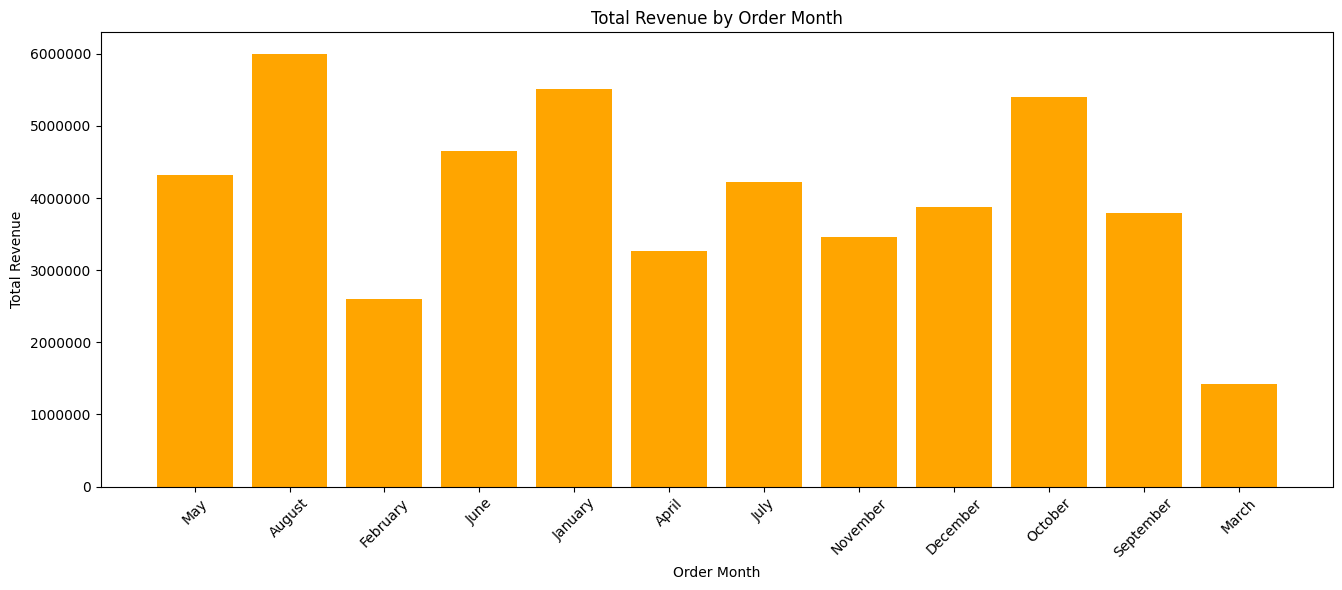

In [26]:
plt.figure(figsize=(13,6))

plt.bar(Data_Frame['Order Month'], Data_Frame['Total Revenue'],color='orange')

plt.xlabel('Order Month')  # Label for the X-axis
plt.ylabel('Total Revenue')  # Label for the Y-axis
plt.title('Total Revenue by Order Month')  # Title of the plot
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.gca().ticklabel_format(style='plain', axis='y') # To remove the scientific notation on the Y-axis
plt.show()

#### > INSIGHT : We can see the month wise total revenue is highest in the month of AUGUST

#

####  Year Wise Sales or Total Revenue Bar graph

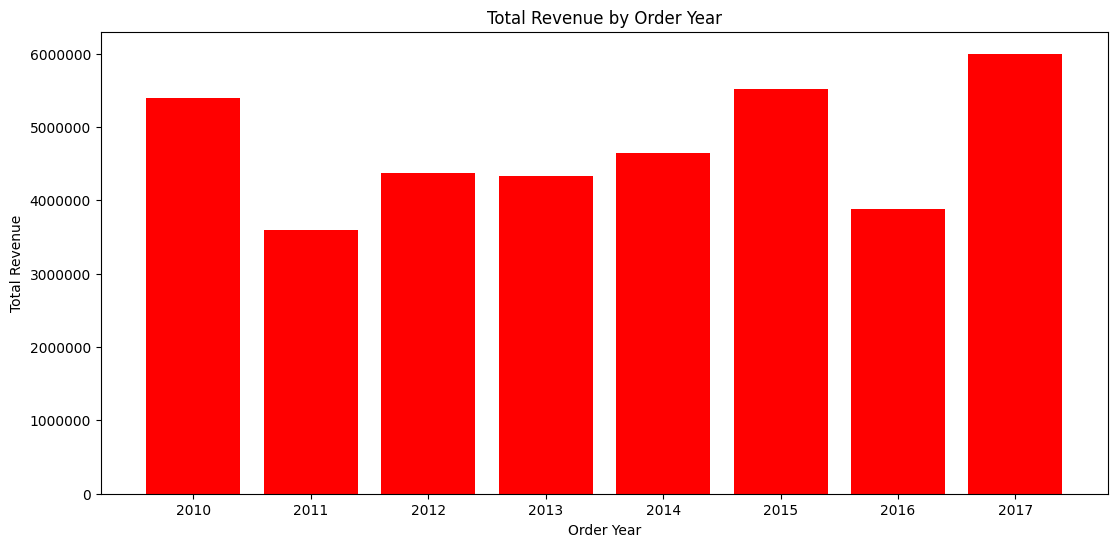

In [27]:
plt.figure(figsize=(13,6))
plt.bar(Data_Frame['Order Year'],Data_Frame['Total Revenue'],color='red')
plt.xlabel('Order Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Order Year')
plt.gca().ticklabel_format(style='plain', axis='y')

####  > INSIGHT : The highest revenue is generated in the year 2017

#

#### - Yearly Month Wise Total Revenue Bar Graph

In [28]:
Year_Month_Column_df=Data_Frame[['Year - Month','Total Revenue']] # created an new variable with Year-month & Total revenue

In [29]:
Year_Month_Column_df.head()

,Year - Month,Total Revenue
0,2010-May,2533654.00
1,2012-August,576782.80
2,2014-February,1158502.59
3,2014-June,75591.66
4,2013-January,3296425.02


In [30]:
Group_Year_Months=Year_Month_Column_df.groupby(by='Year - Month') #Groupby the Year-Month column in Year_Month_Column_df

In [31]:
Year_Month_agg=Group_Year_Months['Total Revenue'].sum() #used the aggerations sum function to total one Year-Month

In [32]:
Year_Month_df=Year_Month_agg.to_frame().reset_index() # Formed an Data Frame to show the plot of this Year_Month_agg 

In [33]:
Year_Month_df.head() # Data Frame

,Year - Month,Total Revenue
0,2010-December,2581786.39
1,2010-February,247956.32
2,2010-July,54319.26
3,2010-June,4245123.20
4,2010-May,2533654.00


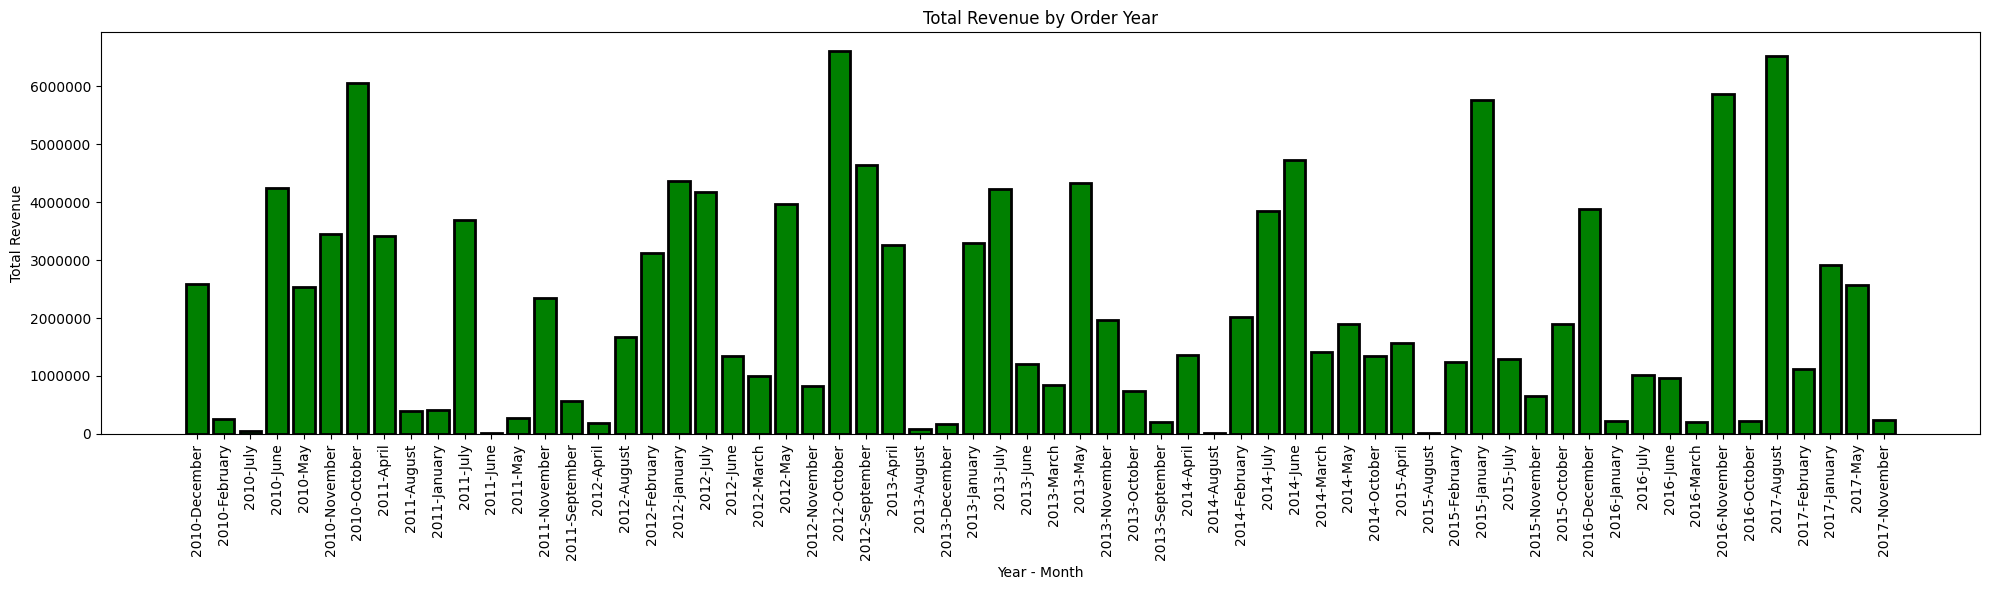

In [34]:
# The Graph that shows the unique Year-Month total revenue 

plt.figure(figsize=(20,6))

plt.bar(Year_Month_df['Year - Month'],Year_Month_df['Total Revenue'],color='green',linewidth=2,edgecolor='black')
plt.xlabel('Year - Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Order Year')
plt.xticks(rotation=90)
plt.gca().ticklabel_format(style='plain', axis='y')
plt.tight_layout()    

#### > INSIGHT : The higest revenue generated in yearly month wise is 2017-August

#

####  Total Revenue Performance by Region:

In [35]:
Data_Frame.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month,Year - Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,May,2010-May
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,August,2012-August
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05,341417157,2014-08-05,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,February,2014-February
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-05-07,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,June,2014-June
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02,115456712,2013-06-02,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,January,2013-January


In [36]:
Group_Region=Data_Frame.groupby('Region') 

In [37]:
Region_agg=Group_Region['Total Revenue'].sum()

In [38]:
Region_df=Region_agg.to_frame().reset_index()

In [39]:
Region_df

,Region,Total Revenue
0,Asia,21347091.02
1,Australia and Oceania,14094265.13
2,Central America and the Caribbean,9170385.49
3,Europe,33368932.11
4,Middle East and North Africa,14052706.58
5,North America,5643356.55
6,Sub-Saharan Africa,39672031.43


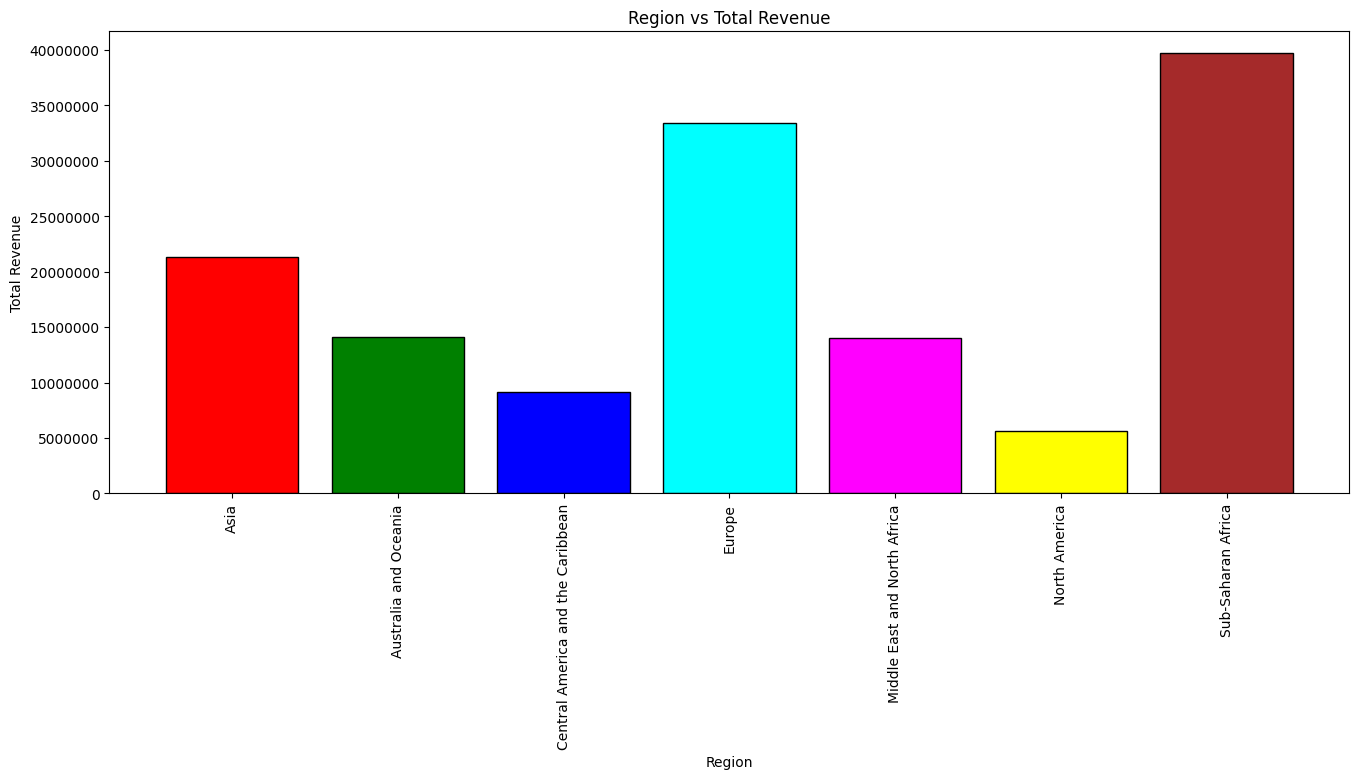

In [40]:
plt.figure(figsize=(16,6))
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'brown'] #list of colors for each bars.

plt.bar(Region_df['Region'],Region_df['Total Revenue'],color=colors,edgecolor='black',linewidth=1) #givig the bars the colors and border to look attractive.
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Region vs Total Revenue')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

#### > INSIGHT : Revenue generated form an Region is higest at SUB-SAHARAN AFRICA

#

#### Filtering Total Revenue data based on Online & Offline for a Region

In [41]:
Online = Data_Frame[Data_Frame['Sales Channel'] == 'Online'] #filtering the online from Sales Channel column

In [42]:
Online_agg=Online.groupby('Region')['Total Revenue'].sum()
Online_df=Online_agg.to_frame().reset_index() 
Online_df

,Region,Total Revenue
0,Asia,9200993.26
1,Australia and Oceania,9892397.28
2,Central America and the Caribbean,916273.30
3,Europe,15246445.66
4,Middle East and North Africa,9059567.70
5,Sub-Saharan Africa,13938281.91


In [43]:
Offline=Data_Frame[Data_Frame['Sales Channel']=='Offline']

In [44]:
Offline_agg=Offline.groupby('Region')['Total Revenue'].sum()
Offline_df=Offline_agg.to_frame().reset_index() 
Offline_df

,Region,Total Revenue
0,Asia,12146097.76
1,Australia and Oceania,4201867.85
2,Central America and the Caribbean,8254112.19
3,Europe,18122486.45
4,Middle East and North Africa,4993138.88
5,North America,5643356.55
6,Sub-Saharan Africa,25733749.52


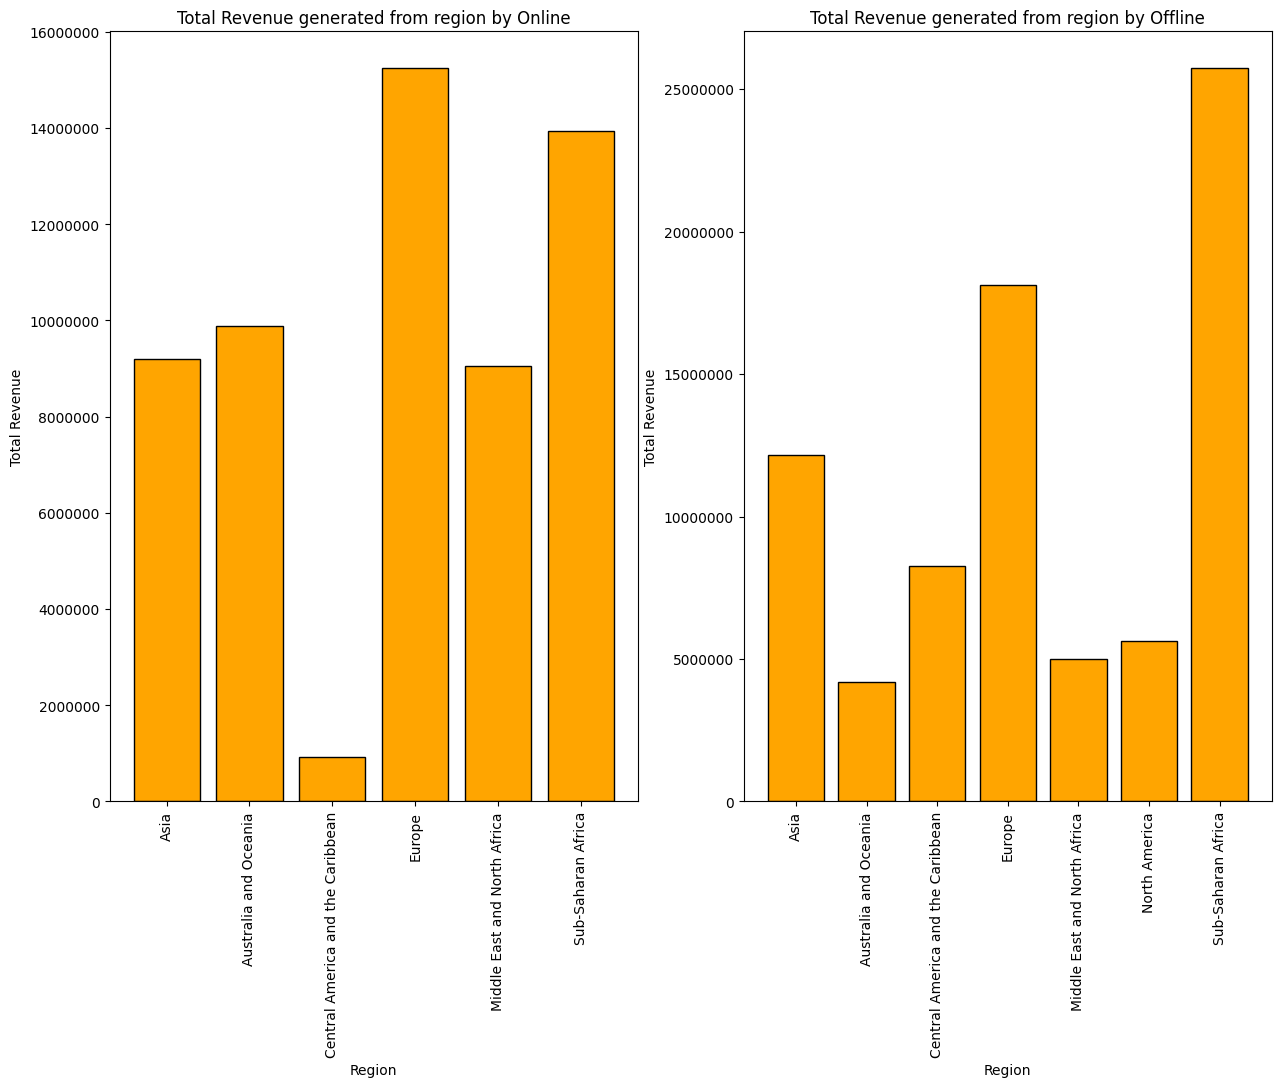

In [45]:
#Filtered Online Sales
plt.figure(figsize=(15,10)) #canvas size

plt.subplot(1,2,1) #fitting the plots in the row wise 

plt.bar(Online_df['Region'],Online_df['Total Revenue'],color='orange',edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue generated from region by Online')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)


plt.subplot(1,2,2)

plt.bar(Offline_df['Region'],Offline_df['Total Revenue'],color='orange',edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue generated from region by Offline')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)


plt.show()


#### > INSIGHT : 
#### As the comparing the plot of Online & Offline, the Revenue generated in Region by Online is highest at  EUPORE Region & the Revenue generated in Region by Offline is highest at SUB-SAHARAN AFRICA

#

#### Top 3 Most Unit Sold Countries in each Region 

In [46]:
Data_Frame.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month,Year - Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,May,2010-May
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,August,2012-August
2,Europe,Russia,Office Supplies,Offline,L,2014-02-05,341417157,2014-08-05,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,February,2014-February
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-05-07,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,June,2014-June
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-01-02,115456712,2013-06-02,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,January,2013-January


In [47]:
Region_Country_df=Data_Frame.groupby(['Region','Country'])['Units Sold'].sum().to_frame().reset_index()

In [48]:
Region_Country_df.head()

,Region,Country,Units Sold
0,Asia,Bangladesh,8263
1,Asia,Brunei,6708
2,Asia,Kyrgyzstan,124
3,Asia,Laos,3732
4,Asia,Malaysia,6267


In [49]:
Sorted_R_C_df=Region_Country_df.sort_values(['Region','Units Sold'],ascending=[True,False])

In [50]:
Sorted_R_C_df.head()

,Region,Country,Units Sold
6,Asia,Myanmar,14180
8,Asia,Turkmenistan,8840
0,Asia,Bangladesh,8263
7,Asia,Sri Lanka,6952
1,Asia,Brunei,6708


In [51]:
Top_country_by_region= Sorted_R_C_df.groupby('Region').head(3)

In [52]:
Top_country_by_region

,Region,Country,Units Sold
6,Asia,Myanmar,14180
8,Asia,Turkmenistan,8840
0,Asia,Bangladesh,8263
9,Australia and Oceania,Australia,12995
17,Australia and Oceania,Tuvalu,9925
12,Australia and Oceania,Fiji,9905
22,Central America and the Caribbean,Honduras,11199
23,Central America and the Caribbean,Nicaragua,8156
19,Central America and the Caribbean,Costa Rica,6409
33,Europe,Norway,12574


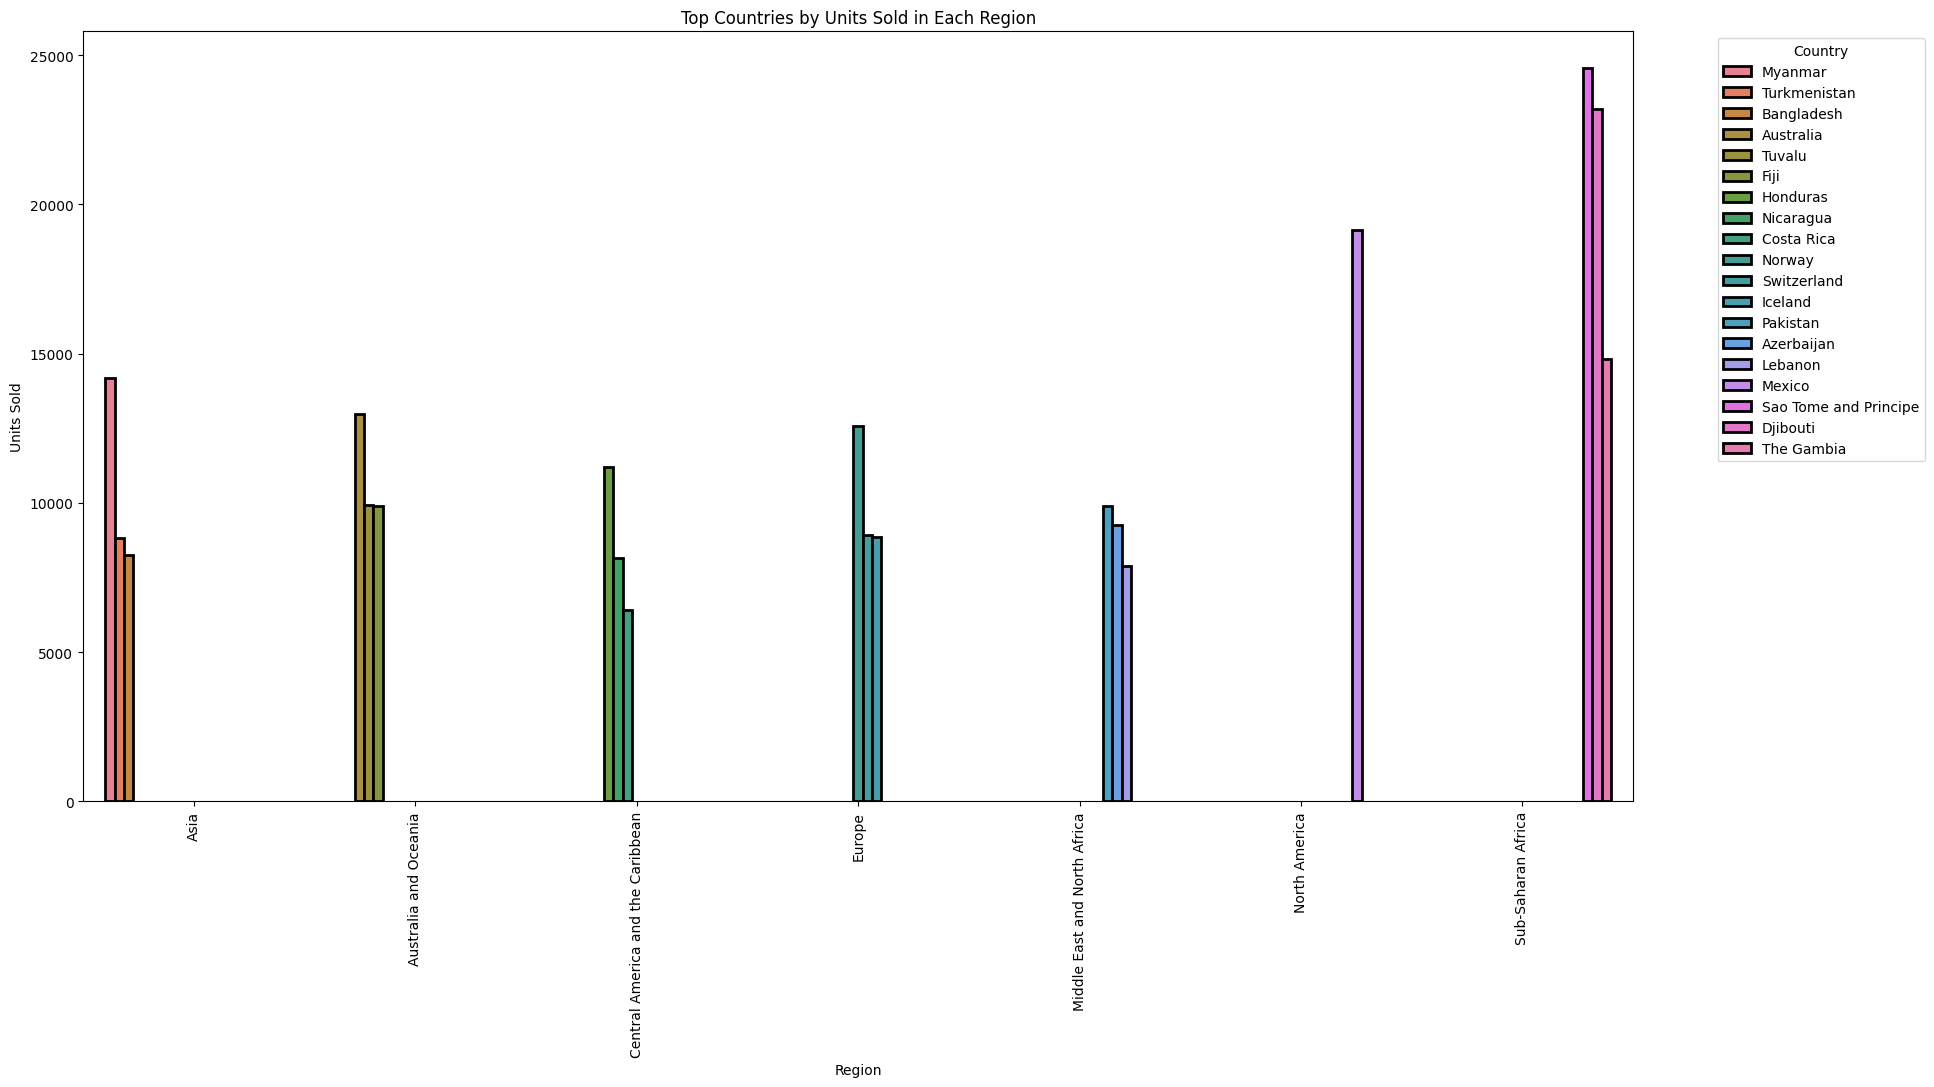

In [53]:
plt.figure(figsize=(20,10))

sns.barplot(
    data=Top_country_by_region,  
    x='Region', 
    y='Units Sold', 
    hue='Country',edgecolor='black',  
    linewidth=2)

# Improve the readability 
plt.xticks(rotation=90)  
plt.xlabel('Region') 
plt.ylabel('Units Sold')  
plt.title('Top Countries by Units Sold in Each Region')  

# Adjust the legend
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside of the plot
plt.show()

#### INSIGHT :
#### As the top 3 with most Unit Sold countries in each region is as followed
#### - Asia : Myanmar, Turkmenistan, Bangladesh
#### - Australia and Oceania : Australia, Tuvalu, Fiji
#### - Central America and the Caribbean : Honduras, Nicaragua, Costa Rica
#### - Europe : Norway, Switzerland, Iceland
#### - Middle East and North Africa : Pakistan, Azerbaijan, Lebanon
#### - North America : Mexico
#### - Sub-Saharan Africa : Sao Tome and Principe, Djibouti, The Gambia